# Simulating Microlensing graphs

$I_{obs} \left( t \right) = I_{s0} + I_{A} + N \left( \sigma^{2} \right) $

$I_{s0}$ is baseline, $I_{A}$ is lens magnification


In [0]:
import numpy as np
from matplotlib import pyplot as plt

## Baseline

$I_{s0} = m_{A} \mbox{sin} \left( \frac{2 \pi t}{T} + \phi \right) $

where

$m_{A}$ is amplitude

$T$ is period

$\phi$ is phase


In [0]:
def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)

In [0]:
is0_ex1 = [intensity_baseline(5, 0.00005, 0, x) for x in range(100)]

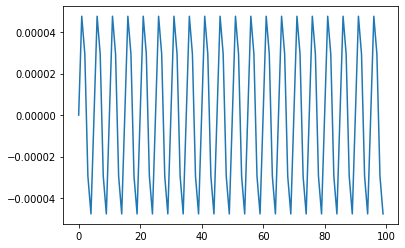

In [5]:
plt.plot(is0_ex1)

## Lens Magnification

$A \left( t \right) = \frac{\left[ u(t) \right]^{2} + 2}{u(t) + \sqrt{[u(t)]^2 + 4}} $

$u(t) = u_0 + \left| \frac{t-t_0}{T_E} \right|$

where

$u_0$ is minimum impact parameter

$T_E$ and $t_0$ determins the radius and shift in time

In [0]:
def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))

In [0]:
iA_ex1 = [lens_magnification(10, 50, 2, x) for x in range(100)]

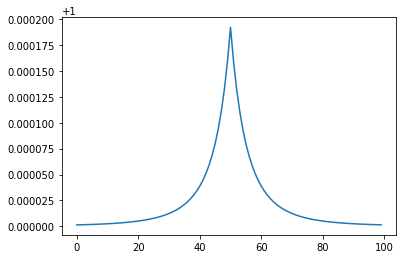

In [8]:
plt.plot(iA_ex1)

## Putting all together

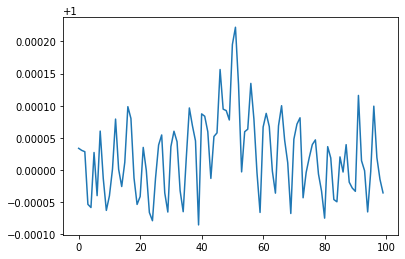

In [9]:
iobs_ex1 = np.array(iA_ex1) + np.array(is0_ex1) + np.random.normal(scale=0.00003, size=100)
plt.plot(iobs_ex1)

Perhaps its a good idea to normalize the graph so that it will have mean=0 and stdev=1

In [0]:
iobs_ex1_normalized = iobs_ex1 / np.linalg.norm(iobs_ex1)

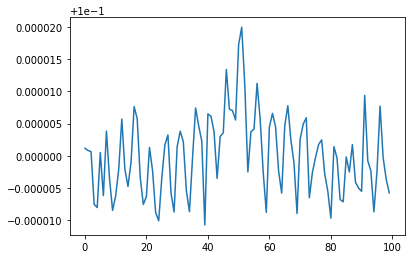

In [11]:
plt.plot(iobs_ex1_normalized)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def intensity_baseline(period, amplitude, phase, t):
  return amplitude * np.sin((2 * np.pi * t / period) + phase)


def lens_magnification(u0, t0, tE, t):
  ut = u0 + np.abs((t - t0) / tE)
  return (ut ** 2 + 2) / (ut * np.sqrt(ut**2 + 4))


def simulate_microlensing(baseline_period, baseline_amplitude, baseline_phase,
                          lens_min_impact, lens_shift, lens_radius, noise, t_range=range(100)):
  i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
  i_A = np.array([lens_magnification(lens_min_impact, lens_shift, lens_radius, t) for t in t_range])
  n = np.random.normal(scale=noise, size=len(t_range))
  return i_s0 + i_A + n

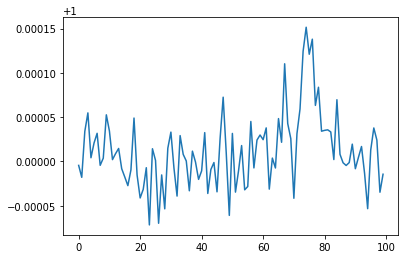

In [13]:
plt.plot(simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100)))

# Fitting sampled data into ARIMA

Installing pyflux (library for time series analysis). Will be using ARIMA class for fitting the sampled data into ARIMA model and make prediction.

In [14]:
pip install pyflux 

     |████████████████████████████████| 1.3MB 4.8MB/s 
     |████████████████████████████████| 962kB 43.8MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656460 sha256=5cf5210b7001c7d4eb9a816fb91056e9debbc782647377533f181d3b796e774b
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
import pyflux as pf

Creating the model

In [0]:
data = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100))

model = pf.ARIMA(data=data, ar=10, integ=1, ma=10, target='microlense', family=pf.Normal())

Fitting the data and getting the summary

In [17]:
fit = model.fit("MLE")
fit.summary()

Normal ARIMA(10,1,10)                                                                                     
======================================================= ==================================================
Dependent Variable: Differenced Series                  Method: MLE                                       
Start Date: 10                                          Log Likelihood: 783.3572                          
End Date: 99                                            AIC: -1522.7143                                   
Number of observations: 89                              BIC: -1467.9643                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0        0.0        0.1999   0.8416   (-0.0 | 0.0)             
AR(1)                                

Plotting the fit-

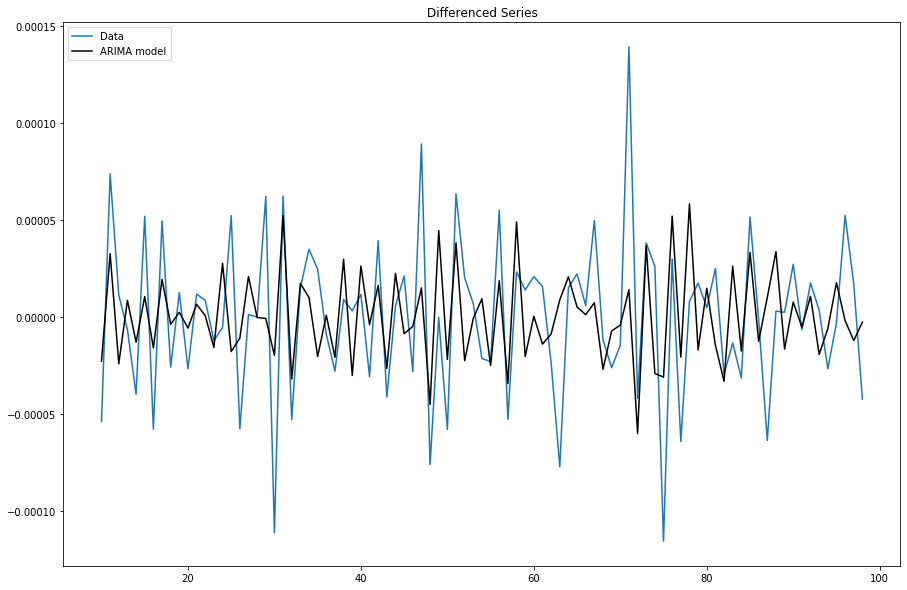

In [18]:
model.plot_fit(figsize=(15,10))

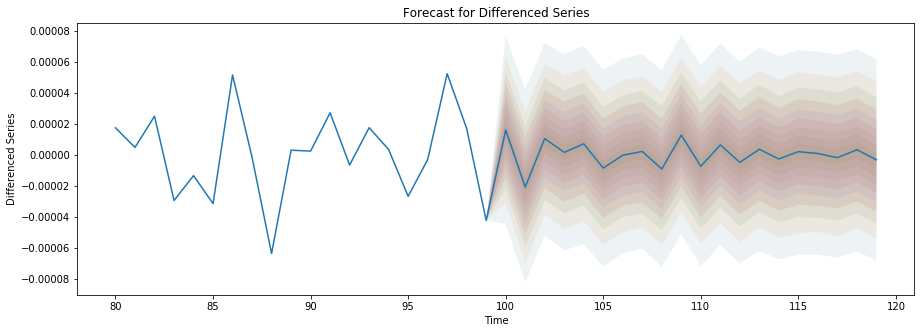

In [19]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [20]:
np.array(model.predict(h=70)['Differenced Series'])

array([ 1.62509863e-05, -2.06188255e-05,  1.06903720e-05,  1.79259585e-06,
        7.32555254e-06, -8.32003890e-06, -7.56547483e-08,  2.36688874e-06,
       -8.94387959e-06,  1.29086938e-05, -7.19505968e-06,  6.58887174e-06,
       -4.65822287e-06,  3.77993871e-06, -2.48240933e-06,  2.24682990e-06,
        1.06293108e-06, -1.63728365e-06,  3.46545280e-06, -2.99220613e-06,
        3.38402486e-06, -2.11233808e-06,  2.61661257e-06, -1.20836296e-06,
        1.47660880e-06,  2.99246274e-08,  1.33176635e-07,  1.21471234e-06,
       -6.31702142e-07,  1.60949405e-06, -7.15241745e-07,  1.46225357e-06,
       -4.38269560e-07,  1.06929165e-06,  5.10759908e-08,  5.50306671e-07,
        5.40553631e-07,  1.46571554e-07,  8.19983154e-07, -1.15538546e-08,
        8.71976563e-07,  2.66860073e-08,  7.63483913e-07,  1.87296878e-07,
        5.71422852e-07,  3.85260878e-07,  3.89975117e-07,  5.34140898e-07,
        2.82898634e-07,  5.97689245e-07,  2.60231999e-07,  5.84355217e-07,
        3.02427207e-07,  

In [21]:
model = pf.ARIMA(data=data, ar=4, integ=1, ma=4, target='microlense', family=pf.Normal())
model.fit("MLE")

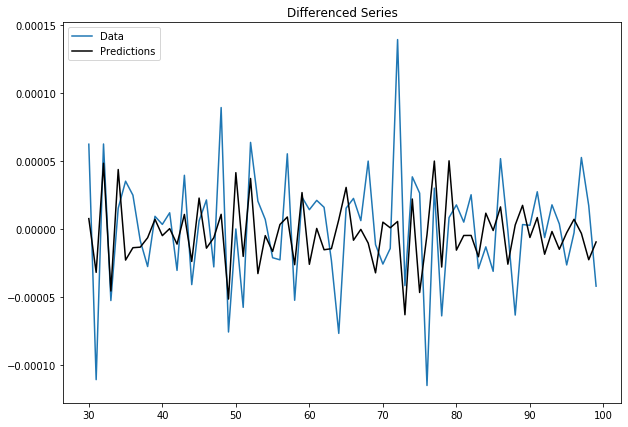

In [22]:
model.plot_predict_is(h=70)

data_with_peak = simulate_microlensing(baseline_period=2, baseline_amplitude=0.00001, baseline_phase=0,
                               lens_min_impact=10, lens_shift=75, lens_radius=1, noise=0.00003, t_range=range(100))

# Generate Train and Test Data

In [0]:
def simulate_noevent(baseline_period, baseline_amplitude, baseline_phase, noise, t_range=range(100)):
    i_s0 = np.array([intensity_baseline(baseline_period, baseline_amplitude, baseline_phase, t) for t in t_range])
    n = np.random.normal(scale=noise, size=len(t_range))
    return i_s0 + n

In [0]:
from tqdm import tqdm

def generate_dataset(num_dataset):
    X_out = np.zeros((num_dataset, 100, 2))
    y_out = np.zeros((num_dataset, 100))

    for x in tqdm(range(num_dataset)):
        seq=None
        ys=None
        if np.random.uniform() > 0.5:
            peak_t = int(np.random.uniform(low=50, high=80))
            seq = simulate_microlensing(baseline_period=2, 
                                        baseline_amplitude=0.00001, 
                                        baseline_phase=0,
                                        lens_min_impact=10, 
                                        lens_shift=peak_t, 
                                        lens_radius=1, 
                                        noise=0.00003, 
                                        t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
            ys[peak_t-10:peak_t] = 1
        else:
            seq = simulate_noevent(baseline_period=2, 
                                baseline_amplitude=0.00001,
                                baseline_phase=0,
                                noise=0.00003,
                                t_range=range(100))
            seq_avg = np.mean(seq[:30])
            seq_std = np.std(seq[:30])
            seq = (seq - seq_avg) / seq_std
            ys = np.zeros(100)
        model=pf.ARIMA(data=seq,ar=4, integ=1, ma=4, family=pf.Normal())
        model.fit('MLE')
        hs = model.predict_is(h=70)
        seq_sim = np.concatenate((seq[:30], hs['Differenced Series']))
        X_out[x,:,0] = seq
        X_out[x,:,1] = seq_sim
        y_out[x] = ys
    
    return X_out, y_out

In [25]:
np.random.seed(420)
X_train, y_train = generate_dataset(100)

100%|██████████| 100/100 [04:15<00:00,  2.59s/it]


In [26]:
np.random.seed(520)
X_test, y_test = generate_dataset(10)

100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


# Fitting sampled data into Gaussian Process

Trying out Gaussian Process through GPy

Installing GPy (library for Gaussian Process)

In [0]:
pip install GPy

     |████████████████████████████████| 1.0MB 2.8MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2634010 sha256=2b50525ff85bf61ccad40339c15ee9dffe97f90b87040f0a26b963c617ee27eb
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102551 sha256=f5d18cb886d500fb634fc221b70dd6e762ccee13eebe80343b0e02733c135a8c
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy paramz


In [35]:
pip install h5py==2.9.0


In [33]:
pip install gpflow

In [34]:
import gpflow

ContextualVersionConflict: ignored

In [30]:
#import GPy
import gpflow
# Preparing the kernel
k = gpflow.kernels.Matern32(1, variance=1, lengthscales=1.2)
# Fitting simulated data into the model for Gaussian likelihood with full covariance
model_GPR = gpflow.models.gpr.GPR(X_train, y_train, kern=k)
# Fitting simulated data into the model for Gaussian likelihood with Sparse approximation
# model_SGPR = gpflow.gpr.SGPR(X, Y, kern=k)
# Setting the priors and likelihood
model_GPR.kern.variance.prior = gpflow.priors.Gamma(1,0.1)
model_GPR.kern.lengthscales.prior = gpflow.priors.Gamma(1,0.1)
model_GPR.likelihood.variance = 0.1
model_GPR.likelihood.variance.fixed = True
# Print the parameters
print(model_GPR)
# Fitting the model
model_GPR.optimize()
model_GPR.compile()
# mean and variance of the latent function
mu,var = model_GPR.predict_f
# mean and variance of a new data point
mean,variance = model_GPR.predict_y(X_test)

ContextualVersionConflict: ignored

Trying out Gaussian Process through scikit-learn

In [0]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel, ExpSineSquared
kernel = ExpSineSquared(length_scale=2, periodicity=2)
#kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
#kernel = np.power(2,2) * np.exp( - np.subtract.outer(X_train, y_train)**2/(2 * np.power(2,2)))
#kernel = np.cos(1e-4*(np.array([X_train]).T-np.array([y_train]))**2)
#kernel = RBF(length_scale=2)
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel, alpha=1e-1, n_restarts_optimizer=10, normalize_y=True)
#X_train = X_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#X_input = np.array([np.array(list(zip(X_train)))])
#y_input = np.array([np.array(list(zip(y_train)))])
#X_input = X_input.reshape(-1,1)
#y_input = y_input.reshape(-1,1)
gp.fit(X_train[5].reshape(-1,1), y_train[5].reshape(-1,1))
y_pred, sigma = gp.predict(X_test.reshape(-1,1), return_std=True)


In [111]:
print(y_pred.reshape(2000).shape)

(2000,)


Plotting the results

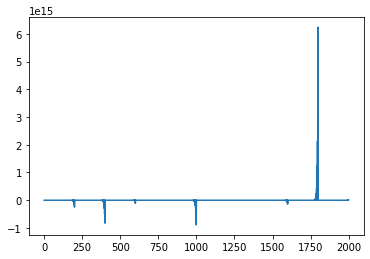

In [90]:
plt.plot(X_test.reshape(-1,1))

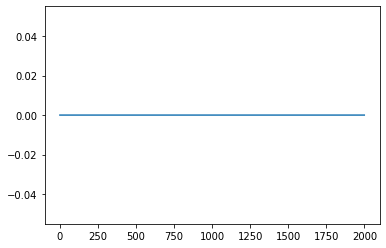

In [68]:
plt.plot(y_pred)

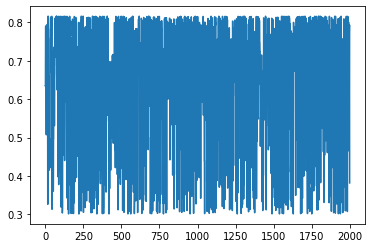

In [69]:
plt.plot(sigma)

In [151]:
plt.plot(X_test.reshape(-1,1), y_pred, 'k-',linewidth=1, alpha=.5)
#plt.fill_between(np.arange(0, 200,0.1), -1*sigma, sigma, alpha=.5, color="#3690C0", linewidth=0.1)
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
plt.fill(np.concatenate(x,
         y_pred + 1.9600 * sigma, y_pred + 1.9600 * sigma,
         alpha=.5, fc='b', ec='None', label='95% confidence interval')


SyntaxError: ignored

In [0]:
def plot_gp(x_pred, y_pred, sigmas, x_train, y_train, true_y=None, samples=None):
    """
    Function that plots the GP mean & std on top of given points.
    x_pred: points for prediction
    y_pred: means
    sigmas: std
    x, y: given data
    true_y: 
    samples: 2D numpy array with shape (# of points, # of samples)
    """
    if samples is not None:
        plt.plot(all_x.reshape(-1, 1), samples)
    
    plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, 
                 ecolor=(0.85, 0.85, 0.85), fmt = "r-", 
                 label="pred mean")
    plt.plot(x_train, y_train, "ko", label="training set")
    if true_y is not None:
        plt.plot(x_pred, true_y, "b-", label="truth function")
    plt.legend()

plot_gp(data, y_pred, sigma, X_train, y_train, true_y=true_y)

NameError: ignored

Inferencing using inverse and choleskey 

In [0]:
def predict_inverse(x_pred, X_train, y_train, kernel, kernel_params, beta_inv):
    """
    GP inference using naive matrix inversion
    x_pred: X1, a numpy vector of size n
    X_train: X2, a numpy vector of size m
    y_train: Y2, a numpy vector of size m
    kernel: a kernel function, should be exponential_cov
    kernel_params: a numpy vector
    @return mu: E[y2]
    @return cov: covariance matrix, a numpy matrix that's n*n 
    """
    C = kernel(X_train, X_train, kernel_params) + np.eye(len(X_train))*beta_inv
    B = kernel(x_pred, X_train, kernel_params)
    C_inv = np.linalg.inv(C)
    A = kernel(x_pred, x_pred, kernel_params) + np.eye(len(x_pred))*beta_inv
    mu = np.dot(B, C_inv).dot(y_train)
    cov = A - np.dot(B, C_inv).dot(B.T)    
    return mu, cov

def predict_cholesky(x_pred, X_train, y_train, kernel, kernel_params, beta_inv):
    """
    GP inference using naive matrix inversion
    x_pred: X1, a numpy vector of size n
    X_train: X2, a numpy vector of size m
    y_train: Y2, a numpy vector of size m
    kernel: a kernel function, should be exponential_cov
    kernel_params: a numpy vector
    @return mu: E[y2]
    @return cov: covariance matrix, a numpy matrix that's n*n 
    """
    A = kernel(x_pred, x_pred, scal, par_SE, par_pol) + np.eye(len(x_pred))*beta_inv
    C = kernel(X_train, X_train, scal, par_SE, par_pol) + np.eye(len(X_train))*beta_inv
    B = kernel(x_pred, X_train, scal, par_SE, par_pol)
    L = np.linalg.cholesky(C)
    inv1 = np.linalg.solve(L, B.T)
    inv2 = np.linalg.solve(L, y_train)
    mu = inv1.T.dot(inv2)
    cov = A-inv1.T.dot(inv1)
    return mu, cov

kernel_parameters = [2, 2]

def predict(x_pred, X_train, y_train, kernel, kernel_params, cholesky=True, beta_inv = 0):
    """
    Top level wrapper function for GP prediction
    """
    if cholesky:
        return predict_cholesky(x_pred, X_train, y_train, kernel, kernel_params, beta_inv)
    else:
        return predict_inverse(x_pred, X_train, y_train, kernel, kernel_params, beta_inv)

# Injecting the residuals into LSTM 

Building the LSTM model

In [0]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
# Initialising the RNN
rnn_lstm = tf.keras.Sequential()

In [0]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(layers.LSTM(units=300, return_sequences=True, input_shape=(None, 2)))
rnn_lstm.add(layers.Dropout(0.1))

# Output layer
rnn_lstm.add(layers.Dense(units=1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc', f1_m])
rnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 300)         363600    
_________________________________________________________________
dropout (Dropout)            (None, None, 300)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           301       
Total params: 363,901
Trainable params: 363,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fitting the RNN to training set
rnn_lstm.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 100 samples, validate on 10 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
rnn_lstm.evaluate(X_test, y_test)

In [0]:
sum(sum(y_test)) / 1000

In [0]:
y_pred=rnn_lstm.predict_proba(X_test)

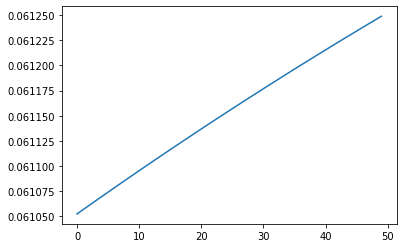

In [0]:
plt.plot(y_pred)

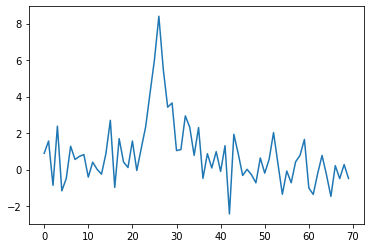

In [0]:
plt.plot(X_test[4,:,0][30:])

Custom F1 score metrix

In [0]:
from sklearn.metrics import f1_score


def dev_f1score(y_label, y_pred, threshold=0.5):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = [1 if p>threshold else 0 for p in list(itertools.chain(*y_pred))]
    return f1_score(label_cast_flat, pred_flat)

def plot_curve(y_label, y_pred):
    label_cast_flat = list(itertools.chain(*y_label.astype(int)))
    pred_flat = list(itertools.chain(*y_pred))
    precision, recall, threshold = precision_recall_curve(label_cast_flat, pred_flat)
    f1 = 2 * (precision * recall) / (precision + recall)
    plot = plt.figure()
    plt.plot(threshold, precision[1:], label='Precision')
    plt.plot(threshold, recall[1:], label='Recall')
    plt.plot(threshold, f1[1:], label='F1')
    plt.legend()
    print('Best threshold: ', threshold[np.argmax(f1)-1])
    print('Best F1-Score: ', np.max(f1))
    return plot